<a href="https://colab.research.google.com/github/AriesXX31/Project-AI-get-10000-data/blob/main/Project_AI_get_10000_data_Lawongan%2C_Renaldy_Richard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Koneksikan Google Colab Dengan Google Drive
#Mount Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


#Library yang digunakan untuk ambil data dari twitter
#Install Library

In [ ]:
!pip install -q snscrape==0.3.4
!pip install Sastrawi
import re
import pandas as pd
import snscrape.modules.twitter as sntwitter
import ast
import string
import nltk #import library nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize #import word_tokenize for tokenizing text into words
from nltk.stem.porter import PorterStemmer #import Porter Stemmer Algorithm 
from nltk.stem import WordNetLemmatizer #import WordNet lemmatizer 
from nltk.corpus import stopwords #import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer

# Import library
import datetime as dt
import re
import string
import snscrape.modules.twitter as sntwitter
import tweepy
import pandas as pd
import ast
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from multiprocessing import Pool
from functools import partial
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 14.5 MB/s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Penarikan 10000 Data

In [ ]:
#Menentukan maximal tweets yang akan diambil
#Bisa diganti nanti jumlah data yang akan diambil 
maxTweets = 10000
tweets_list2 = []

#Mencari data tweets sesuai keyword
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Pilpres 2024 since:2019-01-10 until:2022-06-24 lang:id').get_items()):
    if i>maxTweets:
      break
    tweets_list2.append([tweet.date, tweet.content, tweet.username])

In [ ]:
#Simpan data dalam tabel
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Text', 'Username'])

tweets_df2

,Datetime,Text,Username
0,2022-06-23 23:55:04+00:00,"Wow amazing, Warbiyasahh 👏👏\nMas Mentrih menja...",denni_sauya
1,2022-06-23 23:51:19+00:00,"https://t.co/wn46rXdrC1\n\nBarangsiapa, ngelik...",Budhiana
2,2022-06-23 23:50:03+00:00,PDI Perjuangan ( PDIP ) tidak akan berkoalisi ...,ngopibareng_id
3,2022-06-23 23:45:25+00:00,"Yusuf Mansur Dukung Anies di Pilpres 2024, Gun...",pelitakininews
4,2022-06-23 23:45:12+00:00,@PDI_Perjuangan pilpres 2024 pasangan capres c...,NoerPutra70
...,...,...,...
9996,2022-05-29 07:00:02+00:00,Puan Maharani yang kaya akan pengalaman jadi m...,keyrozn2
9997,2022-05-29 07:00:01+00:00,Saya melihat Puan sebagai Ketua DPR sangat mat...,cincayo1
9998,2022-05-29 07:00:01+00:00,Puan Maharani dinilai berhasil membawa kestabi...,Sup3rBooY
9999,2022-05-29 07:00:01+00:00,Banyak masyarakat yng ingin Puan maju di pilpr...,Juminteun7


#Simpan 10000 data yang sudah diambil ke dalam google drive

In [ ]:
tweets_df2.to_csv('drive/MyDrive/10000datapilpres.csv', sep=',', index=False)

#Baca 10000 data yang ada dalam google drive

In [ ]:
tweets_data = pd.read_csv('drive/MyDrive/10000datapilpres.csv')
tweets = tweets_data[['Datetime', 'Username', 'Text']]
tweets = tweets #kalau ambil data 100 dari atas 100: & dan kalau ambil data dari bawah -100:
tweets

,Datetime,Username,Text
0,2022-06-23 23:55:04+00:00,denni_sauya,"Wow amazing, Warbiyasahh 👏👏\nMas Mentrih menja..."
1,2022-06-23 23:51:19+00:00,Budhiana,"https://t.co/wn46rXdrC1\n\nBarangsiapa, ngelik..."
2,2022-06-23 23:50:03+00:00,ngopibareng_id,PDI Perjuangan ( PDIP ) tidak akan berkoalisi ...
3,2022-06-23 23:45:25+00:00,pelitakininews,"Yusuf Mansur Dukung Anies di Pilpres 2024, Gun..."
4,2022-06-23 23:45:12+00:00,NoerPutra70,@PDI_Perjuangan pilpres 2024 pasangan capres c...
...,...,...,...
9996,2022-05-29 07:00:02+00:00,keyrozn2,Puan Maharani yang kaya akan pengalaman jadi m...
9997,2022-05-29 07:00:01+00:00,cincayo1,Saya melihat Puan sebagai Ketua DPR sangat mat...
9998,2022-05-29 07:00:01+00:00,Sup3rBooY,Puan Maharani dinilai berhasil membawa kestabi...
9999,2022-05-29 07:00:01+00:00,Juminteun7,Banyak masyarakat yng ingin Puan maju di pilpr...


#PREPROCESSING DATA 

In [ ]:
!wget https://github.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/raw/master/cleaning_source/update_combined_slang_words.txt
!ls

--2022-06-30 02:12:57--  https://github.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/raw/master/cleaning_source/update_combined_slang_words.txt
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/master/cleaning_source/update_combined_slang_words.txt [following]
--2022-06-30 02:12:57--  https://raw.githubusercontent.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/master/cleaning_source/update_combined_slang_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [ ]:
#File yang sudah diambil, kita akan gunakan untuk menangani kata slang
slangJson = {} #Digunakan untuk menyimpan kata slang dalam dictionary
with open('update_combined_slang_words.txt', 'r') as slangFile:
  slangJson = ast.literal_eval(slangFile.read())

print(slangJson)
print(slangJson['@'])

{'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

contoh = "org2 pd gak percaya klo pak Anies akan msk pilpres 2024"
contoh = word_tokenize(contoh)

for i in range(len(contoh)):
  if contoh[i] in slangJson:
    contoh[i] = slangJson[contoh[i]]

print(contoh)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['orang-orang', 'pada', 'tidak', 'percaya', 'kalau', 'pak', 'Anies', 'akan', 'masuk', 'pilpres', '2024']


In [ ]:
import nltk
nltk.download('punkt')
gkounter = 0 # menggunakan variabel ini untuk mencatat berapa banyak data
             # yang sudah diproses oleh fungsi-fungsi dibawah ini
            
def cleaningText(text):
    global gkounter
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # hapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', str(text)) # hapus hashtag
    text = re.sub(r'RT[\s]', '',  str(text)) # hapus RT
    text = re.sub(r"http\S+", '',  str(text))# hapus link
    text = re.sub(r'[0-9]+', '', str(text)) # hapus angka
    text = re.sub(r'[^0-9A-Za-z \t]|(\w+:\/\/\S+)+','', str (text)) # hapus emoticon
    text = text.replace('\n', ' ')# ganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # hapus semua tanda baca
    text = text.strip(' ') # hapus spasi kosong yang ada di awal dan di akhir teks
    print(f"cleaned {gkounter} text")
    gkounter += 1
    return text

#casefolding
def casefoldingText(text): # mengubah huruf menjadi huruf kecil
    global gkounter
    text = text.lower() 
    print(f"casefolded {gkounter} text")
    gkounter += 1
    return text

#tokenizing
def tokenizingText(text): # memisahkan string menjadi kumpulan token
    global gkounter
    text = word_tokenize(text) 
    print(f"tokenized {gkounter} text")
    gkounter += 1
    return text

#normalisasi slang words 
def normalizeSlangWords(text):  #normalisasi kata alay/slang menjadi kata baku bahasa indonesia
    global gkounter
    for i in range(len(text)):
      if text[i] in slangJson:
        text[i] = slangJson[text[i]]
    print(f"normalized slang words {gkounter} text")
    gkounter += 1
    return text

#normalisasi slang word - filtering text
#https://github.com/masdevid/ID-Stopwords 
def filteringText(text): # hapus stop words
    global gkounter
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    print(f"filtered {gkounter} text")
    gkounter += 1
    return text

#stemming
def stemmingText(text): # buat semua kata menjadi kata baku (contoh: 'melelahkan' => 'lelah')
    global gkounter
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    print(f"stemmed {gkounter} text")
    gkounter += 1
    return text

def toSentence(list_words): # fungsi untuk menyambung kembali token-token kata menjadi satu kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tweet_sample = "How :) \x86 to take control of your #debt https://codeigniter.com/user_guide/database/connecting.html#manually-connecting-to-a-database"
gKounter = 0
tweet_sample = cleaningText(tweet_sample)
tweet_sample

cleaned 0 text


'How   to take control of your'

In [ ]:
gKounter = 0
tweets['text_clean'] = tweets['Text'].apply(cleaningText)
tweets['text_clean'].head()

Streaming output truncated to the last 5000 lines.
cleaned 5002 text
cleaned 5003 text
cleaned 5004 text
cleaned 5005 text
cleaned 5006 text
cleaned 5007 text
cleaned 5008 text
cleaned 5009 text
cleaned 5010 text
cleaned 5011 text
cleaned 5012 text
cleaned 5013 text
cleaned 5014 text
cleaned 5015 text
cleaned 5016 text
cleaned 5017 text
cleaned 5018 text
cleaned 5019 text
cleaned 5020 text
cleaned 5021 text
cleaned 5022 text
cleaned 5023 text
cleaned 5024 text
cleaned 5025 text
cleaned 5026 text
cleaned 5027 text
cleaned 5028 text
cleaned 5029 text
cleaned 5030 text
cleaned 5031 text
cleaned 5032 text
cleaned 5033 text
cleaned 5034 text
cleaned 5035 text
cleaned 5036 text
cleaned 5037 text
cleaned 5038 text
cleaned 5039 text
cleaned 5040 text
cleaned 5041 text
cleaned 5042 text
cleaned 5043 text
cleaned 5044 text
cleaned 5045 text
cleaned 5046 text
cleaned 5047 text
cleaned 5048 text
cleaned 5049 text
cleaned 5050 text
cleaned 5051 text
cleaned 5052 text
cleaned 5053 text
cleaned 5054 

0    Wow amazing Warbiyasahh Mas Mentrih menjadi ID...
1    Barangsiapa ngelike nyukribe podcast saya ini ...
2    PDI Perjuangan  PDIP  tidak akan berkoalisi de...
3    Yusuf Mansur Dukung Anies di Pilpres  Guntur R...
4    Perjuangan pilpres  pasangan capres cawapres p...
Name: text_clean, dtype: object

#Membuat data text menjadi lower case 

In [ ]:
tweet_sam = "HOW :) \x86 TO TAKE CONTROL OF YOUR #debt https://codeigniter.com/user_guide/database/connecting.html#manually-connecting-to-a-database"
gKounter = 0
tweet_sam = casefoldingText(tweet_sam)
tweet_sam

casefolded 10002 text


'how :) \x86 to take control of your #debt https://codeigniter.com/user_guide/database/connecting.html#manually-connecting-to-a-database'

#Program Untuk Data Preprocessing 

In [ ]:
  #Preprocessing tweets data
import nltk
nltk.download('stopwords')
gkounter = 0
tweets['text_clean'] = tweets['Text'].apply(cleaningText)
gkounter = 0
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
#gkounter = 0
#tweets.drop(['Text'], axis = 1, inplace = True)
gkounter = 0
tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
gkounter = 0
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(normalizeSlangWords)
gkounter = 0
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
gkounter = 0

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
filtered 5001 text
filtered 5002 text
filtered 5003 text
filtered 5004 text
filtered 5005 text
filtered 5006 text
filtered 5007 text
filtered 5008 text
filtered 5009 text
filtered 5010 text
filtered 5011 text
filtered 5012 text
filtered 5013 text
filtered 5014 text
filtered 5015 text
filtered 5016 text
filtered 5017 text
filtered 5018 text
filtered 5019 text
filtered 5020 text
filtered 5021 text
filtered 5022 text
filtered 5023 text
filtered 5024 text
filtered 5025 text
filtered 5026 text
filtered 5027 text
filtered 5028 text
filtered 5029 text
filtered 5030 text
filtered 5031 text
filtered 5032 text
filtered 5033 text
filtered 5034 text
filtered 5035 text
filtered 5036 text
filtered 5037 text
filtered 5038 text
filtered 5039 text
filtered 5040 text
filtered 5041 text
filtered 5042 text
filtered 5043 text
filtered 5044 text
filtered 5045 text
filtered 5046 text
filtered 5047 text
filtered 5048 text
filtered 5049 text
filtered 5050 text

In [ ]:
!apt install screenfetch
!screenfetch

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  bc giblib1 libid3tag0 libimlib2 scrot
The following NEW packages will be installed:
  bc giblib1 libid3tag0 libimlib2 screenfetch scrot
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 375 kB of archives.
After this operation, 1,280 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 bc amd64 1.07.1-2 [86.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libid3tag0 amd64 0.15.1b-13 [31.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libimlib2 amd64 1.4.10-1 [173 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 giblib1 amd64 1.2.4-11 [17.5 kB]
Get:5 http://archive.ubuntu.com/ubuntu 

In [ ]:
#peneliti menggunakan kedua core tersebut
def parallelize(data, func, num_of_processes=2):
    data_split = np.array_split(data, num_of_processes)                                              
    pool = Pool(num_of_processes) 
    data = pd.concat(pool.map(func, data_split))
    pool.close()  
    pool.join()   
    return data

def run_on_subset(func, data_subset):
    return data_subset.apply(func)

def parallelize_on_rows(data, func, num_of_processes=2):
    return parallelize(data, partial(run_on_subset, func), num_of_processes)

# sebelum peneliti melakukan stemming, peneliti menghapus data tweet yang terduplikat
tweets.drop_duplicates(subset = 'text_clean', inplace = True)
print(tweets.count)

gkounter = 0
#code dibawah ini mengerjakan stemming di ke-2 core processor
tweets['text_preprocessed'] = parallelize_on_rows(tweets['text_preprocessed'], stemmingText)

print("exporting to csv")
#Export ke file CSV hasil cleaning
tweets.to_csv('drive/My Drive/10000dataset-cleaned.csv', index = False, header = True,index_label=None)
tweets

# Setelah dilakukan preprocessing dan stemming data menjadi 8823

In [ ]:
# muat hasil preprocessing dari file csv
tweets = pd.read_csv('drive/My Drive/10000dataset-cleaned.csv')
for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = str(tweets['text_preprocessed'][i]).replace("'", "")\
    .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
      list_words.append(word)       
    tweets['text_preprocessed'][i] = list_words       
tweets

,Datetime,Username,Text,text_clean,text_preprocessed
0,2022-06-23 23:55:04+00:00,denni_sauya,"Wow amazing, Warbiyasahh 👏👏\nMas Mentrih menja...",wow amazing warbiyasahh mas mentrih menjadi id...,"[wow, amazing, warbiyasahh, mas, mentrih, idam..."
1,2022-06-23 23:51:19+00:00,Budhiana,"https://t.co/wn46rXdrC1\n\nBarangsiapa, ngelik...",barangsiapa ngelike nyukribe podcast saya ini ...,"[barangsiapa, ngelike, nyukribe, podcast, cera..."
2,2022-06-23 23:50:03+00:00,ngopibareng_id,PDI Perjuangan ( PDIP ) tidak akan berkoalisi ...,pdi perjuangan pdip tidak akan berkoalisi de...,"[pdi, juang, pdip, koalisi, pks, partai, demok..."
3,2022-06-23 23:45:25+00:00,pelitakininews,"Yusuf Mansur Dukung Anies di Pilpres 2024, Gun...",yusuf mansur dukung anies di pilpres guntur r...,"[yusuf, mansur, dukung, anies, pilpres, guntur..."
4,2022-06-23 23:45:12+00:00,NoerPutra70,@PDI_Perjuangan pilpres 2024 pasangan capres c...,perjuangan pilpres pasangan capres cawapres p...,"[juang, pilpres, pasang, capres, cawapres, pra..."
...,...,...,...,...,...
8819,2022-05-29 07:00:02+00:00,keyrozn2,Puan Maharani yang kaya akan pengalaman jadi m...,puan maharani yang kaya akan pengalaman jadi m...,"[puan, maharani, kaya, alam, modal, bagus, maj..."
8820,2022-05-29 07:00:01+00:00,cincayo1,Saya melihat Puan sebagai Ketua DPR sangat mat...,saya melihat puan sebagai ketua dpr sangat mat...,"[puan, ketua, dpr, matang, beliau, jebak, manu..."
8821,2022-05-29 07:00:01+00:00,Sup3rBooY,Puan Maharani dinilai berhasil membawa kestabi...,puan maharani dinilai berhasil membawa kestabi...,"[puan, maharani, nilai, hasil, bawa, stabil, p..."
8822,2022-05-29 07:00:01+00:00,Juminteun7,Banyak masyarakat yng ingin Puan maju di pilpr...,banyak masyarakat yng ingin puan maju di pilpr...,"[masyarakat, yng, puan, maju, pilpres, puan, p..."


#Library Kumpulan Kata Negatif dan Kata Positif

In [ ]:
#Baca tentang polarisasi kata negatif dan kata positif
!git clone https://github.com/fajri91/InSet inset

Cloning into 'inset'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.


In [ ]:
!cat inset/positive.tsv

word	weight
hai	3
merekam	2
ekstensif	3
paripurna	1
detail	2
pernik	3
belas	2
welas	4
kabung	1
rahayu	4
maaf	2
hello	2
promo	3
terimakasih	5
cover	3
mohon	2
mengawal	2
statistik	1
keluangan	3
jalan terbuka	3
banyaknya	3
lebar	3
bentang	1
hendaknya	1
silahkan	3
semboyan	2
ditunggu	2
akses	2
penerangan	2
hi	1
dibantu	2
makasih	4
halo	1
thanks	3
pengembangan	3
diva	2
punya	3
tidak segan	2
detailnya	1
tak segan	2
aktivasi	2
asih	3
kasih sayang	5
kekaguman	4
kehangatan	4
afeksi	2
renjana	2
amor	2
cinta kasih	5
tresna	2
filantropi	2
cintrong	2
suasana (hati)	1
dinamika	3
tuhan	3
merespon	3
makmur	4
suka cita	4
pengguna	1
tunggu	1
lotre	2
nggak	1
kupon	3
terpelihara	4
terawat	5
tersadar	3
tari	1
gejolak	1
kejutan	3
pesta	4
getar	1
allah	5
berlabuh	3
terdaftar	1
negosiasi	2
revolusioner	3
follback	1
pelaminan	4
yasalamualaika	3
uang lelah	2
parsel	2
amplop	3
kenang-kenangan	3
pengasih	4
uang rokok	2
persenan	2
baksis	2
tanda mata	2
angpau	4
hibah	4
upa	2
bingkisan	4
suvenir	4
kesudian	2
beraka

In [ ]:
!cat inset/negative.tsv

word	weight
putus tali gantung	-2
gelebah	-2
gobar hati	-2
tersentuh (perasaan)	-1
isak	-5
larat hati	-3
nelangsa	-3
remuk redam	-5
tidak segan	-2
gemar	-1
tak segan	-1
sesal	-4
pengen	-2
penghayatan	-2
absorpsi	-1
linu	-4
salah benang	-1
sakit	-5
lara	-5
zuhud	-1
mencederai	-4
mengingkari	-4
maaf	-3
mengkhianat	-4
mencelakai	-5
mulu	-1
ngga	-2
borong	-1
lever	-2
kasian	-3
gamau	-4
doang	-1
pulas	-1
abis	-2
coba	-1
kangen	-3
kalau	-1
maunya	-1
seandainya	-1
marilah	-1
bener	-1
yaudah	-4
nggak	-3
gatau	-1
apaan	-4
ngakak	-2
atuh	-1
sekali	-1
menarik hati	-1
cedayam	-2
kece	-3
termakan	-1
belom	-1
malem	-1
mencekau	-2
menduga	-1
menyuarakan	-1
memprediksi	-1
membunyikan	-1
menerka	-1
menaksir	-1
mengantisipasi	-1
nangis	-5
rompok	-2
soalnya	-1
griya	-1
gubuk	-2
anjir	-3
putus jiwa	-5
berlalu dr dunia	-5
putus nyawa	-5
menarik napas penghabisan	-5
membuang nyawa	-5
hilang hayat	-4
putus napas	-4
kojor	-3
berputih tulang	-2
buntu	-3
berkalang tanah	-2
koit	-5
putus usia	-3
buntet	-2
tamat 

#Menghitung Polarity Dari Data 

In [ ]:
lexicon_positive = dict()
import csv
with open('inset/positive.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader) #ubah untuk jadi csv
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

#memuat data lexicon untuk negatif
lexicon_negative = dict()
import csv
with open('inset/negative.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader) #ubah untuk jadi csv
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# fungsi yang akan menentukan polaritas dari sebuah data
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
      polarity = 'neutral'
    return score, polarity

In [ ]:
results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

#Simpan ke file csv
tweets.to_csv(r'drive/MyDrive/10000dataset-polarity.csv', index = False, header = True,index_label=None)

tweets

positive    4464
negative    3481
neutral      879
Name: polarity, dtype: int64


,Datetime,Username,Text,text_clean,text_preprocessed,polarity_score,polarity
0,2022-06-23 23:55:04+00:00,denni_sauya,"Wow amazing, Warbiyasahh 👏👏\nMas Mentrih menja...",wow amazing warbiyasahh mas mentrih menjadi id...,"[wow, amazing, warbiyasahh, mas, mentrih, idam...",4,positive
1,2022-06-23 23:51:19+00:00,Budhiana,"https://t.co/wn46rXdrC1\n\nBarangsiapa, ngelik...",barangsiapa ngelike nyukribe podcast saya ini ...,"[barangsiapa, ngelike, nyukribe, podcast, cera...",0,neutral
2,2022-06-23 23:50:03+00:00,ngopibareng_id,PDI Perjuangan ( PDIP ) tidak akan berkoalisi ...,pdi perjuangan pdip tidak akan berkoalisi de...,"[pdi, juang, pdip, koalisi, pks, partai, demok...",0,neutral
3,2022-06-23 23:45:25+00:00,pelitakininews,"Yusuf Mansur Dukung Anies di Pilpres 2024, Gun...",yusuf mansur dukung anies di pilpres guntur r...,"[yusuf, mansur, dukung, anies, pilpres, guntur...",-5,negative
4,2022-06-23 23:45:12+00:00,NoerPutra70,@PDI_Perjuangan pilpres 2024 pasangan capres c...,perjuangan pilpres pasangan capres cawapres p...,"[juang, pilpres, pasang, capres, cawapres, pra...",8,positive
...,...,...,...,...,...,...,...
8819,2022-05-29 07:00:02+00:00,keyrozn2,Puan Maharani yang kaya akan pengalaman jadi m...,puan maharani yang kaya akan pengalaman jadi m...,"[puan, maharani, kaya, alam, modal, bagus, maj...",1,positive
8820,2022-05-29 07:00:01+00:00,cincayo1,Saya melihat Puan sebagai Ketua DPR sangat mat...,saya melihat puan sebagai ketua dpr sangat mat...,"[puan, ketua, dpr, matang, beliau, jebak, manu...",2,positive
8821,2022-05-29 07:00:01+00:00,Sup3rBooY,Puan Maharani dinilai berhasil membawa kestabi...,puan maharani dinilai berhasil membawa kestabi...,"[puan, maharani, nilai, hasil, bawa, stabil, p...",11,positive
8822,2022-05-29 07:00:01+00:00,Juminteun7,Banyak masyarakat yng ingin Puan maju di pilpr...,banyak masyarakat yng ingin puan maju di pilpr...,"[masyarakat, yng, puan, maju, pilpres, puan, p...",3,positive


In [ ]:
dfVisualisasi = tweets.copy()
dfVisualisasi = dfVisualisasi.head(10)

slangTemp = {
    'pilpres' : 'pemilihan presiden',
    'tuju' : 'tujuan',
    'indonesua': 'indonesia',
    'pdip' : 'partai demokrasi indonesia perjuangan',
    'pdi' :'partai demokrasi indonesia',
    'keadila' : 'keadilan',
    'ektp':'elektronik ktp',
    'bpk': 'bapak',
    'klw': 'kalau',
    'pki': 'partai komunis indonesia',
    'wakid' :'wakil',
    'wapres' :'wakil presiden',
    'cawapres': 'calon wakil presiden',
    'capres':'calon presiden',
    'mentrih':'menteri',
    'ngelike':'suka',
    'aamiin':'amin',
    'ri':'republik indonesia',
    'cantol':'mengaitkan',
    'pks':'partai keadilan sejahtera',
    'nyukribe':'',
    'pileg':'',
    'dipimpindan':'',
    'peking':'',
    'idam':'',
    'mska':'',
    'den':'',
    'keok':'',
    'ktp':'kartu tanda penduduk',
    'milu':'pilih',
    'allahumma':'',
    'lindung':'lindungi',
    'ujang':'pemuda',
    
    

  }
def deleteSlang(text):
  for i in range(len(text)):
    if text[i] in slangTemp:
      text[i] = slangTemp[text[i]]
  return text

tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(deleteSlang)

#wordcloud untuk keseluruhan data tweet

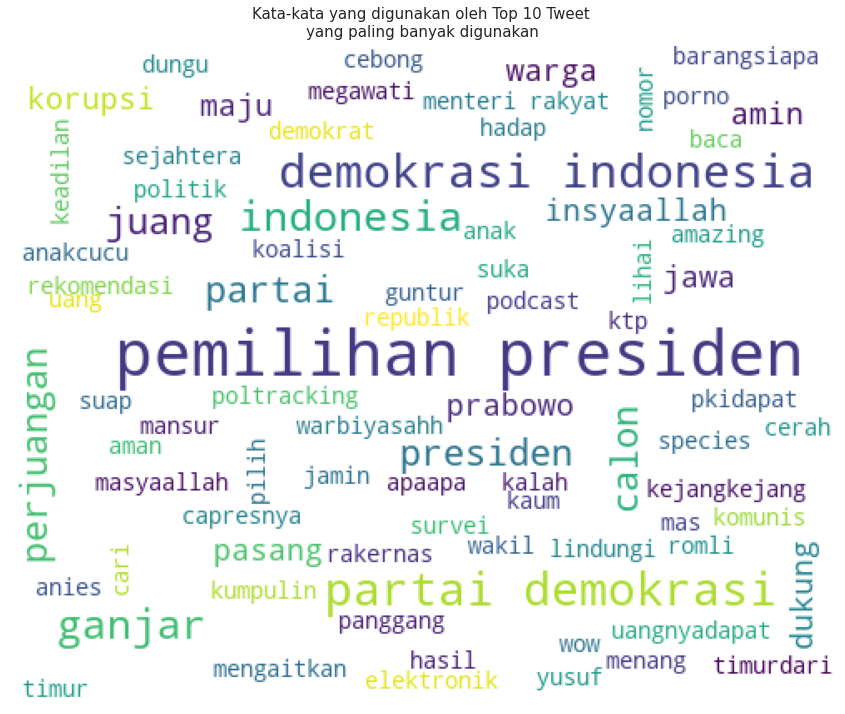

In [ ]:
kumpulanKata = []

for row in dfVisualisasi['text_preprocessed']:
  kumpulanKata += row 

#Buat wordcloud
wordcloud = WordCloud(width = 500, height = 400, background_color = 'white', min_font_size = 10).generate("".join(x + " " for x in kumpulanKata))
fig, ax = plt.subplots(figsize = (30, 10))
ax.set_title('Kata-kata yang digunakan oleh Top 10 Tweet \nyang paling banyak digunakan', fontsize = 15)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

#wordcloud untuk keseluruhan data tweet, data positif tweet dan negatif tweet

In [ ]:
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    neutral_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]

        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)

    return positive_words, negative_words

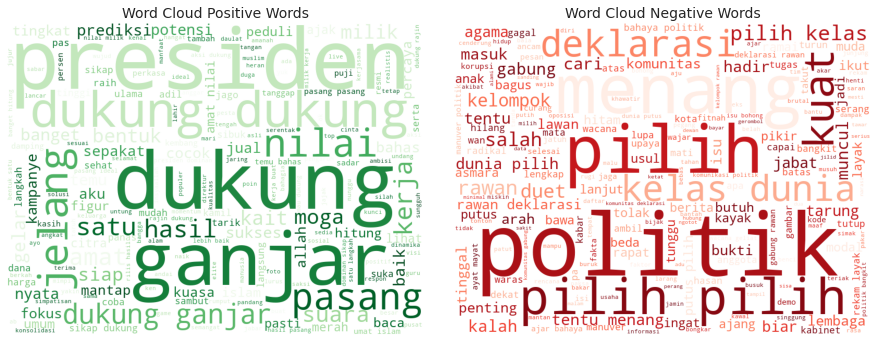

In [ ]:
sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
      #if word not in ['terima']:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'white', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'white', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

positive    4464
negative    3481
neutral      879
Name: polarity, dtype: int64

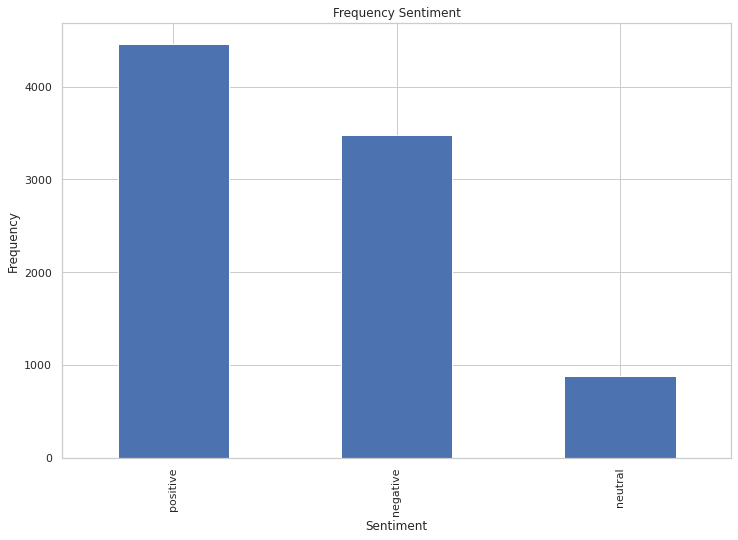

In [ ]:
ax = tweets['polarity'].value_counts().plot(kind='bar', figsize=(12, 8), title='Frequency Sentiment',
             xlabel='Sentiment', ylabel='Frequency', legend=False)    

tweets['polarity'].value_counts()

# Top Tweet yang mempunyai skor polaritas positif tertinggi

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,semoga allah swt memberikan keselamatan kesehatan keberkahan kepada warga jakarta yang memiliki dan mempunyai gubernur yang berakhlak mulia dan berintegritas serta amanah menjalankan tugasnya aamiin semoga setelah mengabdi di jakarta bisa terpilih di pilpres aamiin,30,positive
2,saya kira sebaiknya nasdem dukung pak ganjar atau jendral andika saja di pilpres resmi hasil rakernas nasdem dukung anies andika perkasa dan ganjar jadi capres surya paloh nilainya sama,26,positive
3,pengamat politik dan sejumlah masyarakat menilai pasangan ndoro ganjar dan pak menteri sbg pasangan ideal utk maju pada pilpres hal tsb berdasarkan rekan jejak karier yg terbukti mantap sipp,25,positive
4,presiden pks ahmad syaikhu beserta sejumlah elite partai mengunjungi kantor dpp partai nasdem dalam pertemuannya keduanya sepakat menyamakan visi untuk kehidupan bangsa salah satunya menyepakati persiapan kerja sama pilpres,24,positive
5,sebaiknya ummat muslim garis lurus berakal sehat bersatu untuk dukung pasangan anispuan pada pilpres tahun mendatangkenapa anisanis piyawai dlm managemen pemerintahanpuanpuan adalah simbol keberagaman dan berjiwa pemersatu,24,positive
6,elektabilitas gaet terus melejitgubernur ganjar pranowo amp menteri bumn dinilai oleh pengamat politik dan sejumlah masyarakat sbg pasangan ideal utk maju pada pilpres masyarakat menilai hal tsb berdasarkan jejak karier yg terbukti mantap,24,positive
7,qadar selalu tepat waktu tidak majumundur satu hari allah bukan hanya menetapkan siapa jadi presiden ri tapi juga menetapkan mekanisme proses sebabakibat usahakejadian menuju qadar menang pilpres langkah tepat amp langkah salah dlm usaha itu ketetapan allah,23,positive
8,pasangan ganjar pranowo dan erick thohir dinilai sebagai pasangan yang sangat ideal untuk maju di pilpres sebab keduanya samasama memiliki kinerja dengan prestasi hebat yang mampu menarik perhatian masyarakat,23,positive
9,direktur executif partner politik indonesia ab solissa mengatakan pujian surya paloh dinilai sebagai dukungan kepada di pilpres mantap,23,positive
10,pengamat politik menilai presiden joko widodo jokowi merestui ganjar pranowo untuk maju dalam pilpres penilaiannya tersebut berdasarkan pernyataan jokowi saat menghadiri rakernas projosemangat untuk terus dukung pemimpin berintegritas,23,positive


In [ ]:
# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
X = tweets['text_preprocessed'].apply(toSentence) 
max_features = 20000

#lalu tokenisasi kembali kalimat tersebut dengan membatasi jumlah
#fitur sesuai dengan 'max_features'
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

(8824, 43)

In [ ]:
data = tweets.query('polarity!="neutral"')
data.head()

,Datetime,Username,Text,text_clean,text_preprocessed,polarity_score,polarity
0,2022-06-23 23:55:04+00:00,denni_sauya,"Wow amazing, Warbiyasahh 👏👏\nMas Mentrih menjadi IDAMAN warga Jawa Timur.\n\nDari hasil survei Poltracking Indonesia menunjukkan warga Jawa Timur inginkan @erickthohir maju dalam pilpres 2024.\n#BangkitBersamaET https://t.co/6HeAJr5vZK",wow amazing warbiyasahh mas mentrih menjadi idaman warga jawa timurdari hasil survei poltracking indonesia menunjukkan warga jawa timur inginkan maju dalam pilpres,"[wow, amazing, warbiyasahh, mas, menteri, , warga, jawa, timurdari, hasil, survei, poltracking, indonesia, warga, jawa, timur, maju, pemilihan presiden]",4,positive
3,2022-06-23 23:45:25+00:00,pelitakininews,"Yusuf Mansur Dukung Anies di Pilpres 2024, Guntur Romli: Memang Lihai Cari Cantolan Politik\n\nhttps://t.co/twH9Pd9yZD",yusuf mansur dukung anies di pilpres guntur romli memang lihai cari cantolan politik,"[yusuf, mansur, dukung, anies, pemilihan presiden, guntur, romli, lihai, cari, mengaitkan, politik]",-5,negative
4,2022-06-23 23:45:12+00:00,NoerPutra70,"@PDI_Perjuangan pilpres 2024 pasangan capres cawapres prabowo dan ganjar, yakin 100% jadi, yg lain sy yakin keok, untuk mengalahkan PDIP, maka jangan dipasangkan prabowo dan ganjar, sedangkan pilpres thn 2029 ganjar maju jadi capresnya,",perjuangan pilpres pasangan capres cawapres prabowo dan ganjar yakin jadi yg lain sy yakin keok untuk mengalahkan pdip maka jangan dipasangkan prabowo dan ganjar sedangkan pilpres thn ganjar maju jadi capresnya,"[juang, pemilihan presiden, pasang, calon presiden, calon wakil presiden, prabowo, ganjar, , kalah, partai demokrasi indonesia perjuangan, pasang, prabowo, ganjar, pemilihan presiden, ganjar, maju, capresnya]",8,positive
5,2022-06-23 23:44:03+00:00,Mukidi_alNgibul,"""Ganjar Bacakan 7 Rekomendasi Rakernas PDIP, Nomor 4 soal Pilpres 2024""\n\nKaum Cebong baik dari species 🐕 Peking maupun 🐷 Panggang pendukung Den Bokep pada kejang-kejang....😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝😝\n\n https://t.co/BRVu09ccgu https://t.co/Riyczi1Ytf",ganjar bacakan rekomendasi rakernas pdip nomor soal pilpres kaum cebong baik dari species peking maupun panggang pendukung den bokep pada kejangkejang,"[ganjar, baca, rekomendasi, rakernas, partai demokrasi indonesia perjuangan, nomor, pemilihan presiden, kaum, cebong, species, , panggang, dukung, , porno, kejangkejang]",3,positive
6,2022-06-23 23:40:27+00:00,osamie1760,SUAP RAKYAT DUNGU OLEH CALON PILPRES 2024 DARI @ganjarpranowo\nDari mana uangnya?\nDapat bagian Korupsi E-KTP dan lainnya aman2 saja dari @KPK_RI yg dipimpindan sesama ANAK-CUCU PKI\nDapat perlindungan dari @jokowi dan MEGAWATI @PDI_Perjuangan ANAK PKI\n👇👇👇\nhttps://t.co/TVhMFYp0m0 https://t.co/jsd0JDjmpN,suap rakyat dungu oleh calon pilpres dari dari mana uangnyadapat bagian korupsi ektp dan lainnya aman saja dari ri yg dipimpindan sesama anakcucu pkidapat perlindungan dari dan megawati perjuangan anak pki,"[suap, rakyat, dungu, calon, pemilihan presiden, uangnyadapat, korupsi, elektronik ktp, aman, republik indonesia, , anakcucu, pkidapat, lindungi, megawati, juang, anak, partai komunis indonesia]",-10,negative


#FEATURE ENGINEERING USING TF IDF, AND HASHING VECTORIZER 

In [ ]:
#TFIDF
# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
X = data['text_preprocessed'].apply(toSentence) 
max_features = 20000
# membuat feature engineering menggunakan tfidf
tfidf_vector = TfidfVectorizer(analyzer='word', max_features = 20000)
tfidf_vector.fit(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape
print(X)

[[   0    0    0 ...    8    2    1]
 [   0    0    0 ...  118 3250    9]
 [   0    0    0 ...   12    8  637]
 ...
 [   0    0    0 ...   19  242  790]
 [   0    0    0 ...   19  242  790]
 [   0    0    0 ...   19  242  790]]


In [ ]:
# HashingVectorizer
# import library hashingvectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
A = data['text_preprocessed'].apply(toSentence) 
n_features = 20000
# membuat feature engineering menggunakan hashingvectorizer
hash_vector = HashingVectorizer(analyzer='word', n_features = 20000)
hash_vector.fit(A.values)
A = tokenizer.texts_to_sequences(A.values)
A = pad_sequences(A)
A.shape
print(A)

[[   0    0    0 ...    8    2    1]
 [   0    0    0 ...  118 3250    9]
 [   0    0    0 ...   12    8  637]
 ...
 [   0    0    0 ...   19  242  790]
 [   0    0    0 ...   19  242  790]
 [   0    0    0 ...   19  242  790]]


#LSTM (LONG SHORT TERM MEMORY)

In [ ]:
# rubah label menjadi data numerik
polarity_encode = {'negative' : 0, 'positive' : 1}
y = data['polarity'].map(polarity_encode).values

# pisahkan data kita menjadi dua bagian, 80% untuk training, dan 20% untuk testing/validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6356, 43) (6356,)
(1589, 43) (1589,)


In [ ]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units = hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model

In [ ]:
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
# buat model ML kita
model = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        dropout_rate = 0.2,
                        embed_dim = 64,
                        hidden_unit = 32,
                        optimizers = Adam,
                        learning_rate = 0.001,
                   
                        # Fit Parameters
                        epochs=50, 
                        batch_size=512,
                        # ambil 20% dari data training kita sebagai data validasi sementara
                        validation_split = 0.1)
                         

model_prediction = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 43, 64)            1280000   
                                                                 
 dropout (Dropout)           (None, 43, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 1,292,515
Trainable params: 1,292,515
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/50
12/12 [==============================] - 4s 126ms/step - loss: 1.0631 - accuracy: 0.5024 - val_loss: 0.9986 - val_accuracy: 0.4544
Epoch 2/50
12/12 [==============================] - 1s 95ms/step - loss: 0.8965 - accuracy: 0.4962 - val_loss: 0.7463 - val_accuracy: 0.4308
Epoch 3/50
12/12 [==============================] - 1s 97ms/step - loss: 0.7167 - accuracy: 0.5388 - val_loss: 0.6839 - val_accuracy: 0.5692
Epoch 4/50
12/12 [==============================] - 1s 110ms/step - loss: 0.6856 - accuracy: 0.5767 - val_loss: 0.6629 - val_accuracy: 0.6258
Epoch 5/50
12/12 [==============================] - 2s 165ms/step - loss: 0.6507 - accuracy: 0.6334 - val_loss: 0.6361 - val_accuracy: 0.6447
Epoch 6/50
12/12 [==============================] - 1s 105ms/step - loss: 0.5883 - accuracy: 0.7295 - val_loss: 0.5662 - val_accuracy: 0.7233
Epoch 7/50
12/12 [==============================] - 1s 98ms/step - loss: 0.4557 - accuracy: 0.8164 - val_loss: 0.4588 - val_accuracy: 0.7972
Epoc

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)

Model Accuracy on Test Data: 0.8735053492762744


In [ ]:
import nltk
nltk.download('stopwords')
otherData = pd.DataFrame()
otherData['text'] = ['kami siap dukung bapak ganjar, untuk menjadi calon presiden tahun 2024',
                     'bapak prabowo kerjanya buruk, tidak pantas untuk menjadi presiden', 
                    ]
gkounter = 0
otherData['text_clean'] = otherData['text'].apply(cleaningText)
gkounter = 0
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

cleaned 0 text
cleaned 1 text
casefolded 0 text
casefolded 1 text
tokenized 0 text
tokenized 1 text
filtered 0 text
filtered 1 text
stemmed 0 text
stemmed 1 text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text_clean,text_preprocessed
0,kami siap dukung bapak ganjar untuk menjadi calon presiden tahun,"[dukung, ganjar, calon, presiden]"
1,bapak prabowo kerjanya buruk tidak pantas untuk menjadi presiden,"[prabowo, kerja, buruk, presiden]"


In [ ]:
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,  12,   5,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         13,  45, 775,   1]], dtype=int32)

In [ ]:
y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text_clean,text_preprocessed,Result Prediction
0,kami siap dukung bapak ganjar untuk menjadi calon presiden tahun,"[dukung, ganjar, calon, presiden]",Positive
1,bapak prabowo kerjanya buruk tidak pantas untuk menjadi presiden,"[prabowo, kerja, buruk, presiden]",Negative


#BiLSTM (Bidirectional Long Short Term Memory)

In [ ]:
# rubah label menjadi data numerik
polarity_encode = {'negative' : 0, 'positive' : 1}
y = data['polarity'].map(polarity_encode).values

# pisahkan data kita menjadi dua bagian, 80% untuk training, dan 20% untuk testing/validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6356, 43) (6356,)
(1589, 43) (1589,)


In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.8.2


In [ ]:
!pip install keras
import os
from shutil import rmtree
import math
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    modelBILSTM = Sequential()
    modelBILSTM.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    modelBILSTM.add(Dropout(dropout_rate))
    modelBILSTM.add(Bidirectional(LSTM(units = hidden_unit, activation = 'tanh')))
    modelBILSTM.add(Dropout(dropout_rate))
    modelBILSTM.add(Dense(units = 3, activation = 'softmax'))
    modelBILSTM.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])
    print(modelBILSTM.summary())
    return modelBILSTM

In [ ]:
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
# buat model ML kita
modelBILSTM = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        dropout_rate = 0.2,
                        embed_dim = 64,
                        hidden_unit = 32,
                        optimizers = Adam,
                        learning_rate = 0.001,
                   
                        # Fit Parameters
                        epochs=50, 
                        batch_size=512,
                        # ambil 20% dari data training kita sebagai data validasi sementara
                        validation_split = 0.1)
                         

model_prediction = modelBILSTM.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 43, 64)            1280000   
                                                                 
 dropout_2 (Dropout)         (None, 43, 64)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,305,027
Trainable params: 1,305,027
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 11s 402ms/step - loss: 1.0497 - accuracy: 0.4463 - val_loss: 0.9559 - val_accuracy: 0.4308
Epoch 2/50
12/12 [==============================] - 3s 288ms/step - loss: 0.8619 - accuracy: 0.4787 - val_loss: 0.7289 - val_accuracy: 0.6619
Epoch 3/50
12/12 [==============================] - 4s 322ms/step - loss: 0.7006 - accuracy: 0.5617 - val_loss: 0.6752 - val_accuracy: 0.6399
Epoch 4/50
12/12 [==============================] - 4s 349ms/step - loss: 0.6747 - accuracy: 0.5762 - val_loss: 0.6507 - val_accuracy: 0.5708
Epoch 5/50
12/12 [==============================] - 4s 321ms/step - loss: 0.6234 - accuracy: 0.6886 - val_loss: 0.5977 - val_accuracy: 0.7217
Epoch 6/50
12/12 [==============================] - 4s 315ms/step - loss: 0.5232 - accuracy: 0.7830 - val_loss: 0.5116 - val_accuracy: 0.7563
Epoch 7/50
12/12 [==============================] - 4s 318ms/step - loss: 0.3814 - accuracy: 0.8531 - val_loss: 0.4333 - val_accuracy: 0.8050
Epoch 8/50
12/12

In [ ]:
y_pred = modelBILSTM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)

Model Accuracy on Test Data: 0.8722466960352423


#GRU (Gated Recurrent Unit)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

from tensorflow.keras.optimizers import RMSprop

from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import random
import sys

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import GRU, Embedding, Bidirectional

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import recurrent

In [ ]:
# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
X = data['text_preprocessed'].apply(toSentence) 
max_features = 20000

tfidf_vector = TfidfVectorizer(analyzer='word', max_features = 20000)
tfidf_vector.fit(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape
print(X)

[[   0    0    0 ...    8    2    1]
 [   0    0    0 ...  118 3250    9]
 [   0    0    0 ...   12    8  637]
 ...
 [   0    0    0 ...   19  242  790]
 [   0    0    0 ...   19  242  790]
 [   0    0    0 ...   19  242  790]]


In [ ]:
# rubah label menjadi data numerik
polarity_encode = {'negative' : 0, 'positive' : 1}
y = data['polarity'].map(polarity_encode).values

# pisahkan data kita menjadi dua bagian, 80% untuk training, dan 20% untuk testing/validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6356, 43) (6356,)
(1589, 43) (1589,)


In [ ]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate= 0.2, optimizers = Adam, learning_rate = 0.001):
  model = Sequential()
  model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
  model.add(Dropout(dropout_rate))
  model.add(layers.GRU(units = hidden_unit, activation= 'tanh', recurrent_activation = "sigmoid"))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units = 3, activation='softmax'))
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizers(lr = learning_rate), metrics = ['accuracy']) #
  print(model.summary())
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model, dropout_rate = 0.2, 
                        embed_dim = 64, hidden_unit = 32, optimizers = Adam, 
                        learning_rate = 0.001, epochs = 50, batch_size = 512, 
                        validation_split = 0.1)

model_prediction = model.fit(X_train, y_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 43, 64)            1280000   
                                                                 
 dropout_4 (Dropout)         (None, 43, 64)            0         
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,289,507
Trainable params: 1,289,507
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
12/12 [=====================

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)

Model Accuracy on Test Data: 0.8640654499685336


In [ ]:
y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text_clean,text_preprocessed,Result Prediction
0,kami siap dukung bapak ganjar untuk menjadi calon presiden tahun,"[dukung, ganjar, calon, presiden]",Positive
1,bapak prabowo kerjanya buruk tidak pantas untuk menjadi presiden,"[prabowo, kerja, buruk, presiden]",Negative


#BUILD MODEL USING MACHINE LEARNING TRADITIONAL ALGORITHMS
#NAIVE BAYES
#DECISION TREE
#LOGISTIC REGRESSION
#RANDOM FOREST
#SVM



In [ ]:
dataset = data.copy()[['text_preprocessed', 'polarity_score']]

def categorize(row):
  if row > 0:
    return 1
  elif row < 0:
    return 0


dataset['polarity_score'] = dataset['polarity_score'].apply(categorize)
dataset['text_preprocessed'] = dataset['text_preprocessed'].apply(toSentence)
dataset

,text_preprocessed,polarity_score
0,wow amazing warbiyasahh mas menteri warga jawa timurdari hasil survei poltracking indonesia warga jawa timur maju pemilihan presiden,1
3,yusuf mansur dukung anies pemilihan presiden guntur romli lihai cari mengaitkan politik,0
4,juang pemilihan presiden pasang calon presiden calon wakil presiden prabowo ganjar kalah partai demokrasi indonesia perjuangan pasang prabowo ganjar pemilihan presiden ganjar maju capresnya,1
5,ganjar baca rekomendasi rakernas partai demokrasi indonesia perjuangan nomor pemilihan presiden kaum cebong species panggang dukung porno kejangkejang,1
6,suap rakyat dungu calon pemilihan presiden uangnyadapat korupsi elektronik ktp aman republik indonesia anakcucu pkidapat lindungi megawati juang anak partai komunis indonesia,0
...,...,...
8819,puan maharani kaya alam modal bagus maju pemilihan presiden puan peduli cilik,1
8820,puan ketua dpr matang beliau jebak manuvermanuver penting pemilihan presiden puan peduli cilik,1
8821,puan maharani nilai hasil bawa stabil politik dinamika politik indonesia panas dekat pemilihan presiden puan peduli cilik,1
8822,masyarakat yng puan maju pemilihan presiden puan peduli cilik,1


#Naive Bayes

In [ ]:
# FEATURE ENGINEERING AND MODEL TRAINING
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer



train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dataset['text_preprocessed'], dataset['polarity_score'])

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
tfidf_vector = TfidfVectorizer(analyzer='word', max_features = 20000)

tfidf_vector.fit(dataset['text_preprocessed'])
train_x = tfidf_vector.transform(train_x)
valid_x = tfidf_vector.transform(valid_x)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
modelNB = ComplementNB()
modelNB.fit(train_x, train_y)
cross_cnb = cross_val_score(modelNB, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)  

Cross Validation score =  [0.77013423 0.76761745 0.77013423 0.78085642 0.77078086]


In [ ]:
import sklearn.metrics as metrics
from nltk import metrics
from sklearn import metrics
y_pred = modelNB.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

accuracy = metrics.accuracy_score(modelNB.predict(valid_x), valid_y)
print("accuracy :", accuracy)

MCC = metrics.matthews_corrcoef(modelNB.predict(valid_x), valid_y)
print("MCC :",MCC)

#Classification Report
print(metrics.classification_report(valid_y, modelNB.predict(valid_x)))

Model Accuracy on Test Data: 0.7845998993457474
accuracy : 0.7845998993457474
MCC : 0.5578662057428136
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       858
           1       0.79      0.85      0.82      1129

    accuracy                           0.78      1987
   macro avg       0.78      0.77      0.78      1987
weighted avg       0.78      0.78      0.78      1987



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
modelDT = DecisionTreeClassifier()
modelDT.fit(train_x, train_y)
cross_dt = cross_val_score(modelDT, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_dt) 

Cross Validation score =  [0.72567114 0.71644295 0.74496644 0.74055416 0.71200672]


In [ ]:
y_pred = modelDT.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

MCC = metrics.matthews_corrcoef(modelDT.predict(valid_x), valid_y)
print("MCC :",MCC)

print(metrics.classification_report(valid_y, modelDT.predict(valid_x)))

Model Accuracy on Test Data: 0.7352793155510821
MCC : 0.46037368272624224
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       858
           1       0.77      0.77      0.77      1129

    accuracy                           0.74      1987
   macro avg       0.73      0.73      0.73      1987
weighted avg       0.74      0.74      0.74      1987



In [ ]:
otherData = pd.DataFrame()
otherData['text'] = ['kami siap dukung bapak ganjar, untuk menjadi calon presiden tahun 2024',
                     'bapak prabowo kerjanya buruk, tidak pantas untuk menjadi presiden', 
                    ]
gkounter = 0
otherData['text_clean'] = otherData['text'].apply(cleaningText)
gkounter = 0
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)

gkounter = 0
otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

cleaned 0 text
cleaned 1 text
casefolded 0 text
casefolded 1 text
tokenized 0 text
tokenized 1 text
filtered 0 text
filtered 1 text
stemmed 0 text
stemmed 1 text


,text_clean,text_preprocessed
0,kami siap dukung bapak ganjar untuk menjadi calon presiden tahun,"[dukung, ganjar, calon, presiden]"
1,bapak prabowo kerjanya buruk tidak pantas untuk menjadi presiden,"[prabowo, kerja, buruk, presiden]"


In [ ]:
X_otherData = otherData['text_preprocessed'].apply(toSentence)

X_otherData = tfidf_vector.transform(X_otherData)
print (X_otherData)

  (0, 8055)	0.20844410854230336
  (0, 2837)	0.6401825517525747
  (0, 2380)	0.487921084863579
  (0, 1553)	0.5555631098184207
  (1, 8055)	0.11534796833909748
  (1, 7980)	0.384869889646746
  (1, 4636)	0.4781023048322393
  (1, 1491)	0.7810174136070493


In [ ]:
y_pred_otherData = modelNB.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text_clean,text_preprocessed,Result Prediction
0,kami siap dukung bapak ganjar untuk menjadi calon presiden tahun,"[dukung, ganjar, calon, presiden]",Positive
1,bapak prabowo kerjanya buruk tidak pantas untuk menjadi presiden,"[prabowo, kerja, buruk, presiden]",Negative


In [ ]:
#Kalau pakai model BLSTM kita harus cari BLSTM pakai model apa, kita tinggal rubah di bagian fungsi model.
#Kalau logistic Regression, random forest, dan svm juga kita tinggal cari tau library nya pakai apa, nanti kita tinggal rubah sesuaikan dengan modelnya.
#Usahakan juga nama modelnya kasih beda, supaya kita tau kita pakai model apa.

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_x, train_y)

cross_cnb_lr = cross_val_score(classifier, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb_lr)  

Cross Validation score =  [0.85067114 0.83305369 0.85402685 0.83627204 0.83963056]


In [ ]:
import sklearn.metrics as metrics
y_pred = classifier.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

accuracy = metrics.accuracy_score(classifier.predict(valid_x), valid_y)
print("accuracy :", accuracy)

MCC = metrics.matthews_corrcoef(classifier.predict(valid_x), valid_y)
print("MCC :",MCC)

print(metrics.classification_report(valid_y, classifier.predict(valid_x)))

Model Accuracy on Test Data: 0.8761952692501258
accuracy : 0.8761952692501258
MCC : 0.7483611210604894
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       858
           1       0.90      0.88      0.89      1129

    accuracy                           0.88      1987
   macro avg       0.87      0.87      0.87      1987
weighted avg       0.88      0.88      0.88      1987



#Random Forest

In [ ]:
# # Fitting Random Forest Regression to the dataset
# # import the regressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# # create regressor object
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# # fit the regressor with x and y data
# regressor.fit(train_x, train_y)

# cross_cnb_rf = cross_val_score(regressor, train_x, train_y,n_jobs = -1)
# print("Cross Validation score = ",cross_cnb_rf)  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# create regressor object
regressor = RandomForestClassifier(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(train_x, train_y)

cross_cnb_rf = cross_val_score(regressor, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb_rf)  

Cross Validation score =  [0.80201342 0.80201342 0.81291946 0.79261125 0.78253568]


In [ ]:
import sklearn.metrics as metrics
y_pred = regressor.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

accuracy = metrics.accuracy_score(regressor.predict(valid_x), valid_y)
print("accuracy :", accuracy)

MCC = metrics.matthews_corrcoef(regressor.predict(valid_x), valid_y)
print("MCC :",MCC)

print(metrics.classification_report(valid_y, regressor.predict(valid_x)))

Model Accuracy on Test Data: 0.8097634625062909
accuracy : 0.8097634625062909
MCC : 0.6111192865623015
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       858
           1       0.83      0.84      0.83      1129

    accuracy                           0.81      1987
   macro avg       0.81      0.80      0.81      1987
weighted avg       0.81      0.81      0.81      1987



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = regressor.predict(valid_x)

from sklearn import metrics

print('Mean Absolute Error or Accuracy:', metrics.mean_absolute_error(valid_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(valid_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))

Mean Absolute Error or Accuracy: 0.1902365374937091
Mean Squared Error: 0.1902365374937091
Root Mean Squared Error: 0.4361611370740281


# Support Vector Machine (SVM)

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svc_model.fit(train_x, train_y)

cross_cnb_svm = cross_val_score(svc_model, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb_svm)  

Cross Validation score =  [0.86577181 0.86493289 0.88338926 0.86733837 0.88077246]


In [ ]:
import sklearn.metrics as metrics
y_pred = svc_model.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

accuracy = metrics.accuracy_score(svc_model.predict(valid_x), valid_y)
print("accuracy :", accuracy)

MCC = metrics.matthews_corrcoef(svc_model.predict(valid_x), valid_y)
print("MCC :",MCC)

print(metrics.classification_report(valid_y, svc_model.predict(valid_x)))

Model Accuracy on Test Data: 0.8943130347257172
accuracy : 0.8943130347257172
MCC : 0.7852938143214075
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       858
           1       0.91      0.90      0.91      1129

    accuracy                           0.89      1987
   macro avg       0.89      0.89      0.89      1987
weighted avg       0.89      0.89      0.89      1987



In [ ]:
# check the accuracy on the training set
print(svc_model.score(train_x, train_y))
print(svc_model.score(valid_x, valid_y))# hasilnya sama dengan accuracy yang diatas untuk valid_x, valid_y

0.9699563611950319
0.8943130347257172
